In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2-0.05*np.random.randn(100)

In [4]:
df=pd.DataFrame()

In [6]:
df['X']=X.reshape(100)
df['y']=y
df.head()

,X,y
0,-0.125460,0.042868
1,0.450714,0.624381
2,0.231994,0.156876
3,0.098658,0.128579
4,-0.343981,0.365953


Text(0.5, 1.0, 'X v/s y')

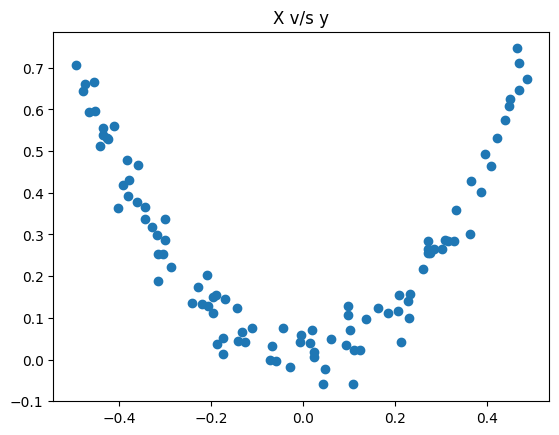

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X v/s y')

lets apply grad boost on it

In [9]:
  df['pred1']=df['y'].mean()
  df.head()

,X,y,pred1
0,-0.125460,0.042868,0.265566
1,0.450714,0.624381,0.265566
2,0.231994,0.156876,0.265566
3,0.098658,0.128579,0.265566
4,-0.343981,0.365953,0.265566


In [11]:
df['res1']=df['y']-df['pred1']
df.head()

,X,y,pred1,res1
0,-0.125460,0.042868,0.265566,-0.222698
1,0.450714,0.624381,0.265566,0.358814
2,0.231994,0.156876,0.265566,-0.108691
3,0.098658,0.128579,0.265566,-0.136987
4,-0.343981,0.365953,0.265566,0.100387


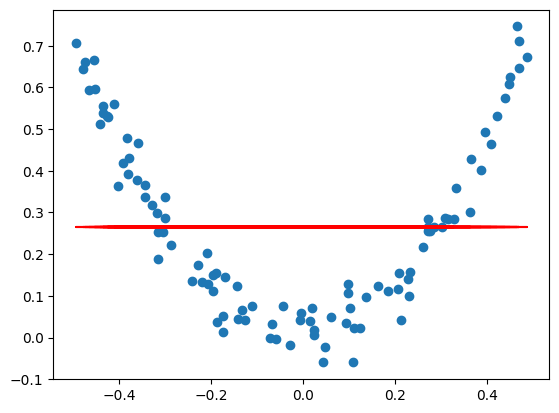

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

model1

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

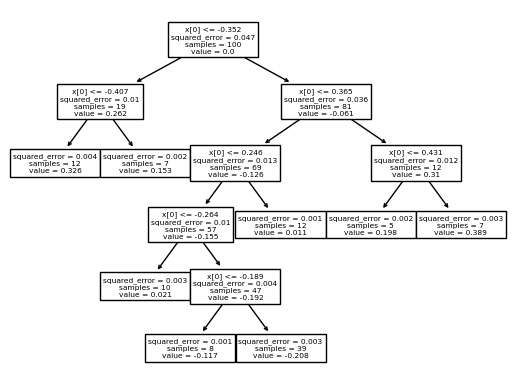

In [16]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [17]:
#generate X_test
X_test=np.linspace(-0.5,0.5,500)

In [20]:
y_pred=0.265566+tree1.predict(X_test.reshape(500,1))

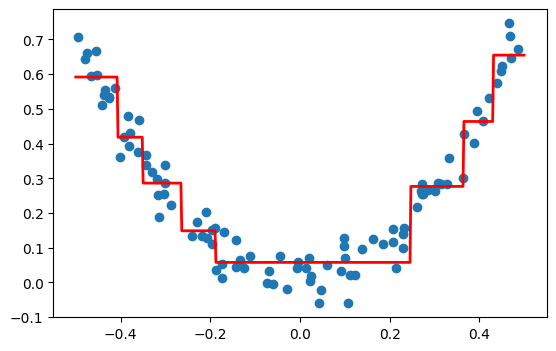

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [23]:
df['pred2']=0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.042868,0.265566,-0.222698,0.057752
1,0.450714,0.624381,0.265566,0.358814,0.654552
2,0.231994,0.156876,0.265566,-0.108691,0.057752
3,0.098658,0.128579,0.265566,-0.136987,0.057752
4,-0.343981,0.365953,0.265566,0.100387,0.286076


In [24]:
df['res2']=df['y']-df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.042868,0.265566,-0.222698,0.057752,-0.014884
1,0.450714,0.624381,0.265566,0.358814,0.654552,-0.030171
2,0.231994,0.156876,0.265566,-0.108691,0.057752,0.099124
3,0.098658,0.128579,0.265566,-0.136987,0.057752,0.070827
4,-0.343981,0.365953,0.265566,0.100387,0.286076,0.079877


In [25]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [27]:
y_pred=0.265566+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X v/s y')

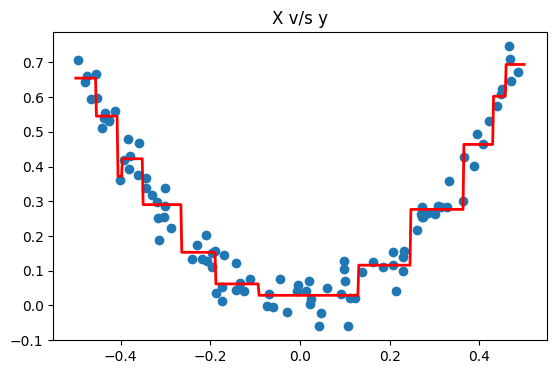

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X v/s y')

lets make a function to make as many model as needed

In [29]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):
  if number==0:
    return
  else:
    #do grad boosting

    if count>1:
      y=y-regs[-1].predict(X)
    else:
      foo=y


    tree_reg=DecisionTreeRegressor(max_depth=5,random_state=42)
    tree_reg.fit(X,y)

    regs.append(tree_reg)

    x1=np.linspace(-0.5,0.5,500)
    y_pred=sum(lr*regressor.predict(x1.reshape(-1,1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1,y_pred,linewidth=2)
    plt.plot(X[:,0],foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


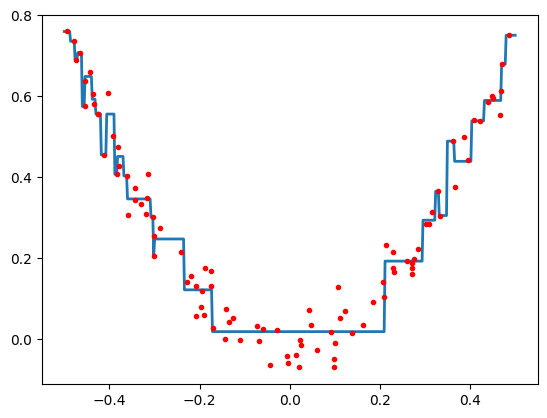

4


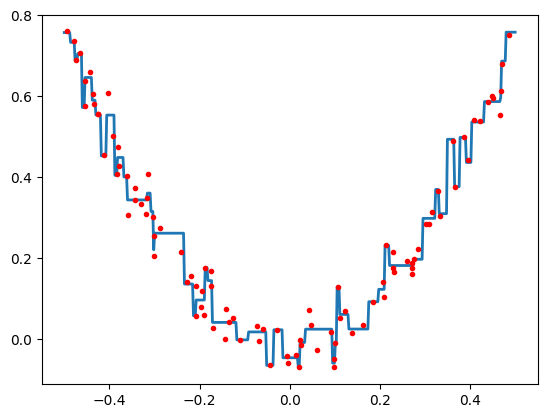

3


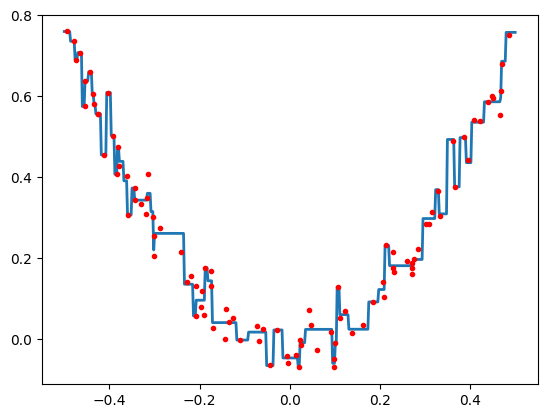

2


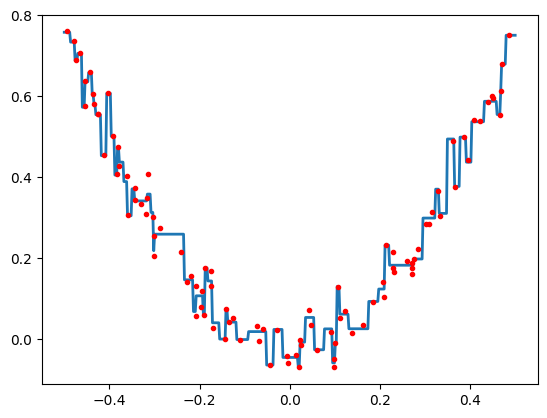

1


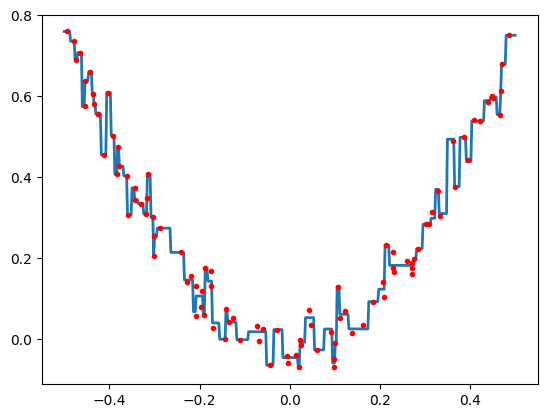

In [30]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2 + 0.05*np.random.randn(100)
gradient_boost(X,y,5,lr=1)